In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [1]:
# Load the Excel file
file_path = "SoilHealthDB_V2.xlsx"
excel_file = pd.ExcelFile(file_path)

# Display all sheet names
sheet_names = excel_file.sheet_names
# print(sheet_names)

In [2]:
# Load main dataset
main_df = excel_file.parse('Sheet1')

# Display first few rows
main_df.head()

,StudyID,ExperimentID,Author_F,Author_G,YearPublication,SamplingYear,Journal,SiteInfor,Country,Latitude,...,MBN_C_SD,MBN_T_SD,38.MBN_Comments,Microelement,SQI,ESS,Texture_C,Comments1,Comments2,Comments3
0,1,1-1,Abawi,G.S.,2000,NaN,Applied Soil Ecology,New York,USA,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Root infected by rot,NaN,NaN
1,1,1-1,Abawi,G.S.,2000,NaN,Applied Soil Ecology,New York,USA,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Root infected by rot,NaN,NaN
2,1,1-2,Abawi,G.S.,2000,NaN,Applied Soil Ecology,New York,USA,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Root infected by rot,NaN,NaN
3,1,1-1,Abawi,G.S.,2000,NaN,Applied Soil Ecology,New York,USA,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Root infected by rot,NaN,NaN
4,1,1-4,Abawi,G.S.,2000,NaN,Applied Soil Ecology,New York,USA,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Root infected by rot,NaN,NaN


In [3]:
# View first 40 column names to explore variables
all_columns = main_df.columns.tolist()
print(all_columns[:40])

['StudyID', 'ExperimentID', 'Author_F', 'Author_G', 'YearPublication', 'SamplingYear', 'Journal', 'SiteInfor', 'Country', 'Latitude', 'Longitude', 'Elevation', 'Tannual', 'MAT', 'Pannual', 'MAP', 'ClimateType', 'TimeAfterCoverCrop', 'Duration', 'CC_planting_date', 'CC_termination_date', 'Time_Comments', 'SamplingDepth', 'SamplingThickness', 'CEC', 'CEC_Unit', 'SoilBD', 'SandPerc', 'SiltPerc', 'ClayPerc', 'Texture', 'SoilpH', 'BackgroundSOC', 'SOC_NaturalVeg', 'SoilKsat', 'SoilFamily', 'CoverCrop', 'CoverCropGroup', 'GrainCrop', 'GrainCropGroup']


In [4]:
# Select columns of interest
columns_of_interest = [
    # Geographic
    'SiteInfor', 'Country', 'Latitude', 'Longitude', 'Elevation', 'ClimateType',
    # Practices
    'CoverCrop', 'CoverCropGroup', 'GrainCrop', 'GrainCropGroup',
    # Soil health indicators
    'SoilBD', 'SoilpH', 'CEC', 'MBN_C', 'MBN_T'
]

# Create subset
subset_df = main_df[columns_of_interest]

# Summary overview of the subset
print(subset_df.describe(include='all'))


                                                SiteInfor Country  \
count                                                5853    5907   
unique                                                367      42   
top     Agricultural Research Station farm, Fort Valle...     USA   
freq                                                  193    2272   
mean                                                  NaN     NaN   
std                                                   NaN     NaN   
min                                                   NaN     NaN   
25%                                                   NaN     NaN   
50%                                                   NaN     NaN   
75%                                                   NaN     NaN   
max                                                   NaN     NaN   

           Latitude    Longitude    Elevation     ClimateType CoverCrop  \
count   5884.000000  5884.000000  5497.000000              55      5051   
unique          NaN  

## Summary Statistics

In [21]:
pd.set_option('display.max_columns', None)
# Ensure SOC is included
subset_df.loc[:, 'SOC'] = main_df['BackgroundSOC']

# Define indicators
soil_indicators = ['SoilBD', 'SoilpH', 'CEC', 'SOC', 'MBN_C', 'MBN_T']

# Summary statistics by CoverCropGroup (per column, dropping NaNs)
summary_by_covercrop = subset_df.groupby('CoverCropGroup')[soil_indicators].agg(['count', 'mean', 'std', 'min', 'max'])

# Summary statistics by Country (per column, dropping NaNs)
summary_by_country = subset_df.groupby('Country')[soil_indicators].agg(['count', 'mean', 'std', 'min', 'max'])

# Display results
# print("Summary by CoverCropGroup:\n", summary_by_covercrop)
# print("\nSummary by Country:\n", summary_by_country)

summary_by_covercrop.head()
summary_by_country.head(50)



SoilBD                                        SoilpH  \
                     count      mean       std       min      max  count   
Country                                                                    
Argentina               64  1.214167  0.099462  1.130000  1.46000      6   
Australia                0       NaN       NaN       NaN      NaN      8   
Bangladesh               0       NaN       NaN       NaN      NaN      0   
Benin                    0       NaN       NaN       NaN      NaN      4   
Brazil                  39  1.270103  0.172382  0.989000  1.50000     25   
Cameroon                 0       NaN       NaN       NaN      NaN     22   
Canada                 104  1.504839  0.123546  1.289758  1.69000     22   
China                  315  1.270389  0.104592  1.080000  1.47000    510   
Costa Rica               0       NaN       NaN       NaN      NaN      0   
Denmark                 32  1.364238  0.047516  1.330300  1.54000     44   
England                  2  0.930000  0.169706  0.810000  1.05000      2   
France                  14  1.222857  0.175035  1.000000  1.52000     20   
Germany                 26  1.449478  0.095068  1.300000  1.64000      6   
Ghana                    0       NaN       NaN       NaN      NaN     20   
Greece                   3  1.490000  0.000000  1.490000  1.49000      7   
Guinea                   0       NaN       NaN       NaN      NaN      0   
India                    0       NaN       NaN       NaN      NaN      0   
Indonesia                0       NaN       NaN       NaN      NaN      7   
Italy                   24  1.442500  0.035661  1.400000  1.48000     52   
Kenya                    0       NaN       NaN       NaN      NaN    100   
Malawi                  33  1.300000  0.082916  1.200000  1.40000    183   
Netherland               0       NaN       NaN       NaN      NaN      8   
New Zealand              7  1.070000  0.000000  1.070000  1.07000      7   
Nigeria                 86  1.306744  0.014828  1.240000  1.31000    281   
Norway                   0       NaN       NaN       NaN      NaN      0   
Peru                     0       NaN       NaN       NaN      NaN      0   
Philippines              0       NaN       NaN       NaN      NaN      0   
Poland                   0       NaN       NaN       NaN      NaN      0   
Republic of Moldova      0       NaN       NaN       NaN      NaN      2   
Russia                   0       NaN       NaN       NaN      NaN      0   
Rwanda                   0       NaN       NaN       NaN      NaN      0   
South Korea              2  1.200000  0.000000  1.200000  1.20000      6   
Spain                    8  1.270000  0.074833  1.200000  1.34000     58   
Sweden                   1  1.360000       NaN  1.360000  1.36000      0   
Switzerland              0       NaN       NaN       NaN      NaN      0   
Tanzania                 0       NaN       NaN       NaN      NaN     43   
Togo                     0       NaN       NaN       NaN      NaN     58   
Turkey                   0       NaN       NaN       NaN      NaN     41   
USA                    868  1.392644  0.197964  0.760000  2.69627    461   
Uganda                   0       NaN       NaN       NaN      NaN     96   
Zambia                  57  1.504386  0.186739  1.180000  1.61000    342   
Zimbabwe                 0       NaN       NaN       NaN      NaN     33   

                                                          CEC              \
                         mean       std       min   max count        mean   
Country                                                                     
Argentina            6.000000  0.000000  6.000000  6.00     0         NaN   
Australia            5.775000  0.520302  5.400000  6.60     2    4.550000   
Bangladesh                NaN       NaN       NaN   NaN     0         NaN   
Benin                5.250000  0.404145  4.900000  5.60     0         NaN   
Brazil               5.080800  0.750805  4.500000  6.31     

In [40]:
cover_crop_map = {
    'No': 'None',
    'Not_available': 'None',
    'Legume': 'Legume',
    'Grass': 'Grass',
    'Brassica': 'Brassica',
    'Mixed': 'Mixed',
    'Broadleaf': 'Other',
    'Broadleaf/Brassica': 'Other',
    'LB': 'Mixed',
    'LG': 'Mixed',
    'LL': 'Mixed',
    'MMT': 'Other',
    'MOT': 'Other',
    'GG': 'Grass',
    'LT': 'Legume',
    'Legume_Tree': 'Legume',
    'Rye': 'Grass',
    'M': 'Mixed',
    'Other': 'Other'
}

main_df['CoverCropGroup_clean'] = main_df['CoverCropGroup'].map(cover_crop_map).fillna('Other')

In [41]:
def simplify_tillage(value):
    if pd.isna(value):
        return 'Unknown'
    value = str(value).lower()
    if 'no' in value or 'nt' in value:
        return 'No-till'
    elif 'reduced' in value or 'minimum' in value or 'strip' in value:
        return 'Reduced-till'
    elif 'conventional' in value or 'moldboard' in value or 'intensive' in value:
        return 'Conventional'
    else:
        return 'Other'

main_df['Tillage_clean'] = main_df['Tillage_Top_T'].apply(simplify_tillage)

### Prepare data for analysis - exploration

In [43]:
viz_df = main_df[[
    'CoverCropGroup_clean', 'Tillage_clean', 'Country', 'Latitude', 'Elevation',
    'SoilBD', 'SoilpH', 'CEC', 'BackgroundSOC', 'MBN_T'
]].rename(columns={'BackgroundSOC': 'SOC'})
viz_df.dropna(subset=['CoverCropGroup_clean', 'Tillage_clean', 'SOC'], inplace=True)

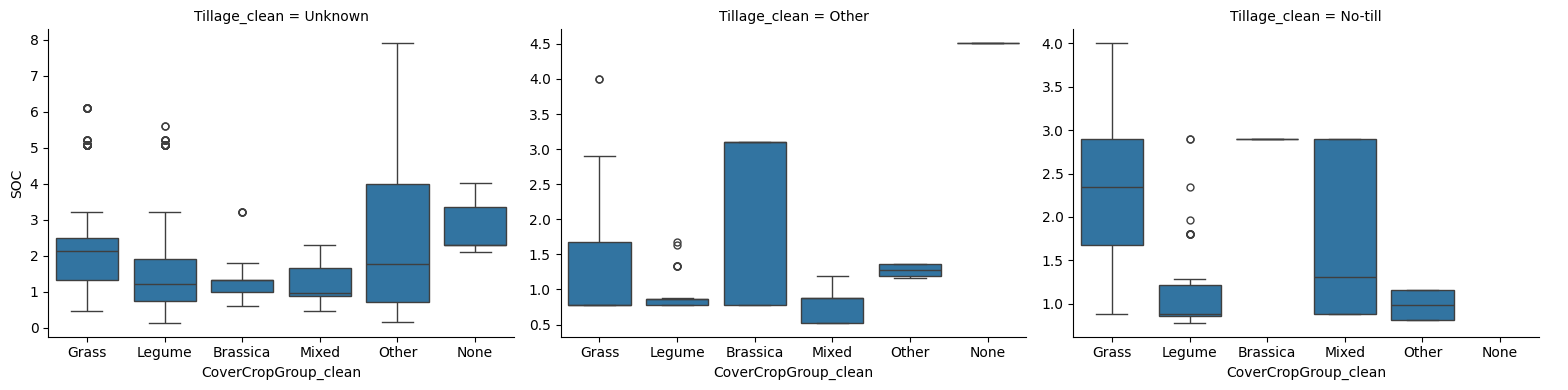

In [46]:
sns.catplot(
    data=viz_df,
    x='CoverCropGroup_clean',
    y='SOC',
    col='Tillage_clean',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1.3,
    sharey=False
)

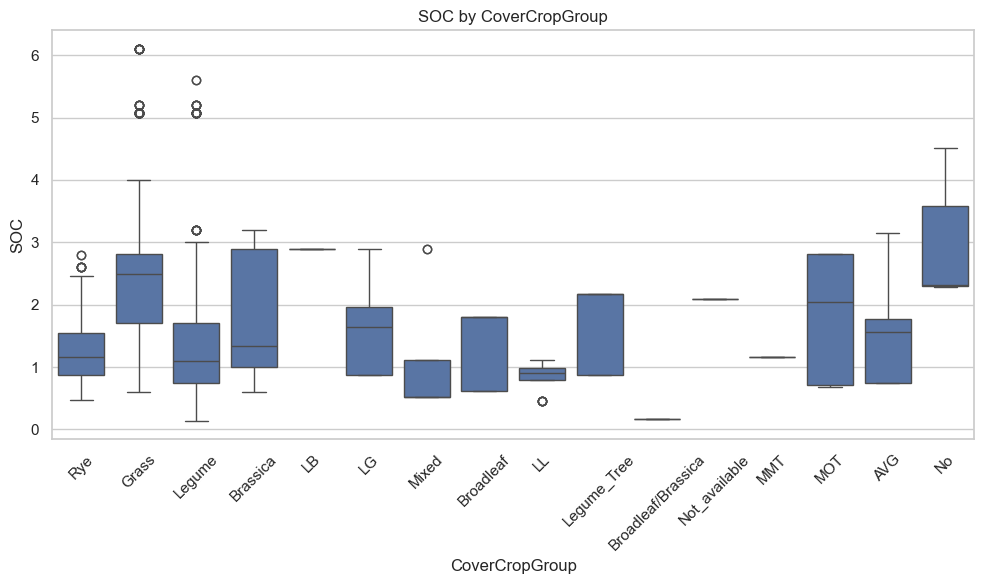

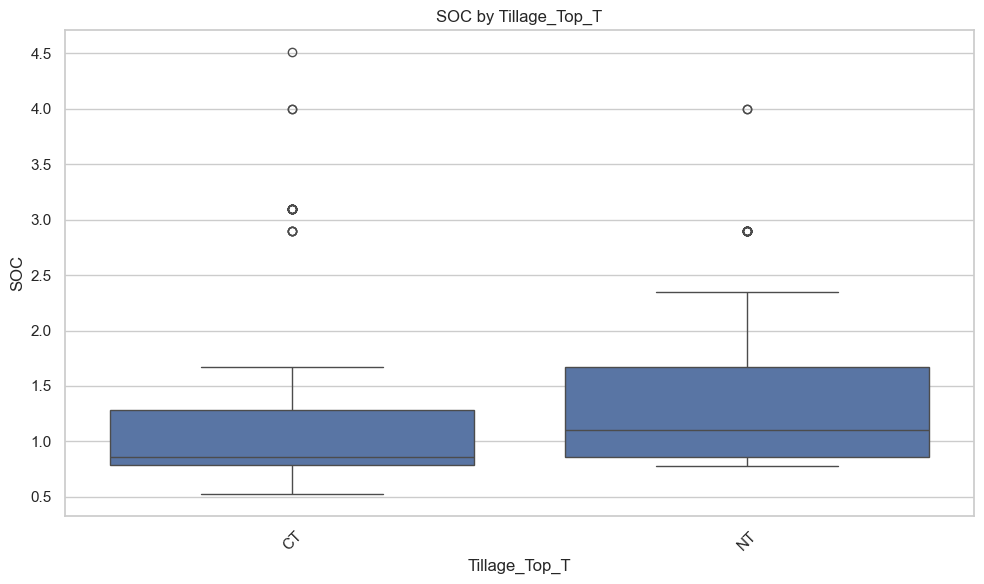

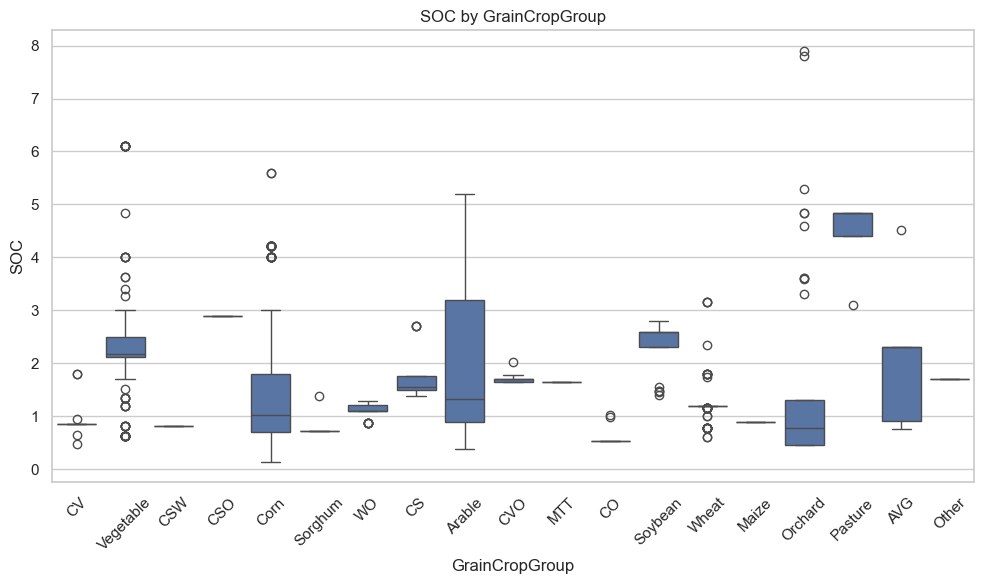

In [58]:
# Ensure SOC and relevant management variables are present
df = main_df

if 'SOC' not in main_df.columns:
    main_df['SOC'] = main_df['BackgroundSOC']

management_vars = ['CoverCropGroup', 'Tillage_Top_T', 'Rotation_Top_T', 'GrainCropGroup', 'Grazing_Top_T']
anova_results = {}
tukey_results = {}

for var in management_vars:
    if var in df.columns:
        temp_df = df[['SOC', var]].dropna()
        if temp_df[var].nunique() < 2:
            continue

        # One-way ANOVA
        model = ols(f'SOC ~ C({var})', data=temp_df).fit()
        anova_table = anova_lm(model, typ=2)
        anova_results[var] = anova_table

        # Tukey HSD
        tukey = pairwise_tukeyhsd(endog=temp_df['SOC'], groups=temp_df[var], alpha=0.05)
        tukey_results[var] = tukey.summary()

        # Boxplot with groupings
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=temp_df, x=var, y='SOC')
        plt.title(f'SOC by {var}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


--- Tukey HSD Results for CoverCropGroup ---
ANOVA Table:
                        sum_sq      df          F         PR(>F)
C(CoverCropGroup)   533.109344    15.0  43.451048  1.920378e-113
Residual           1949.983925  2384.0        NaN            NaN
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
               AVG           Brassica   0.1037    1.0 -0.6314  0.8388  False
               AVG          Broadleaf    -0.15    1.0 -0.9876  0.6876  False
               AVG Broadleaf/Brassica  -1.4196 0.9781 -4.5855  1.7462  False
               AVG              Grass   1.0581    0.0  0.4005  1.7157   True
               AVG                 LB   1.3194 0.3301 -0.3558  2.9946  False
               AVG                 LG  -0.0792    1.0  -0.799  0.6407  False
               AVG                 LL  -0.6939 0.0742

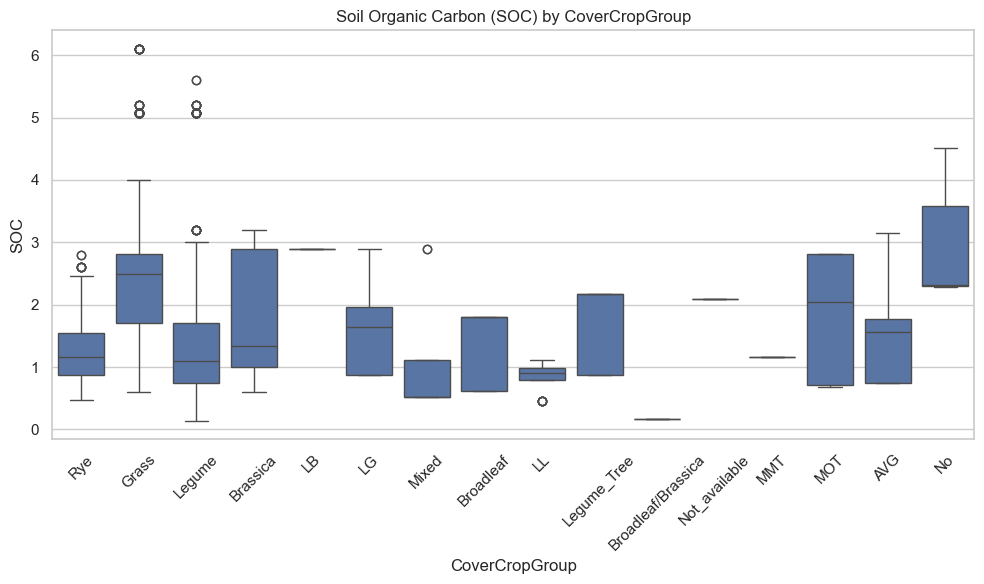


--- Tukey HSD Results for Tillage_Top_T ---
ANOVA Table:
                      sum_sq     df        F  PR(>F)
C(Tillage_Top_T)    2.336400    1.0  3.66116  0.0567
Residual          181.236964  284.0      NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    CT     NT   0.1826 0.0567 -0.0052 0.3704  False
---------------------------------------------------


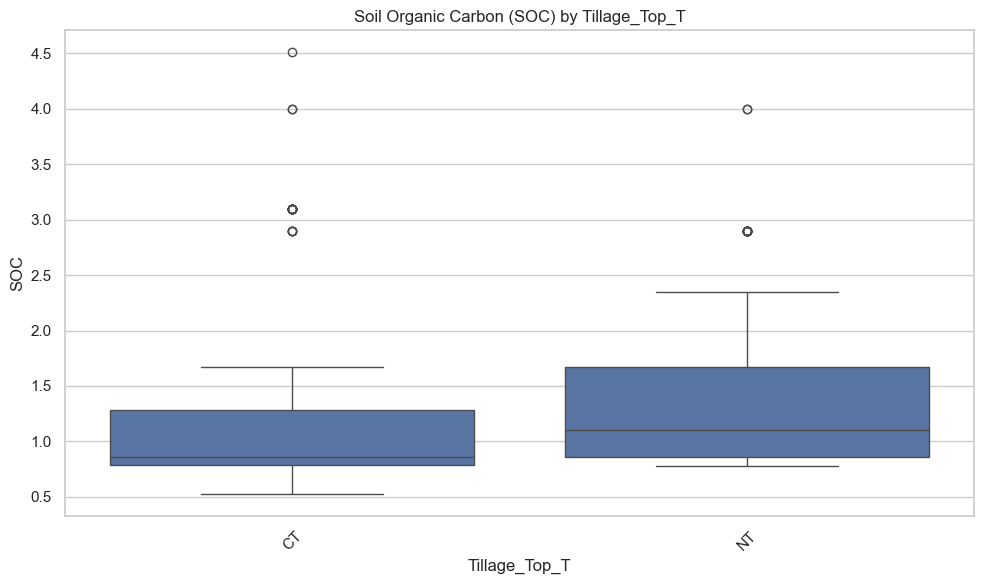


--- Tukey HSD Results for GrainCropGroup ---
ANOVA Table:
                        sum_sq      df          F         PR(>F)
C(GrainCropGroup)   609.207176    18.0  33.039534  4.064026e-102
Residual           2561.959674  2501.0        NaN            NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
      AVG    Arable   0.5075 0.1202 -0.0459  1.0609  False
      AVG        CO  -1.1348 0.0595 -2.2873  0.0178  False
      AVG        CS   0.0529    1.0 -1.0321  1.1379  False
      AVG       CSO   1.1572 0.0225  0.0722  2.2422   True
      AVG       CSW  -0.9317 0.9904 -3.0538  1.1903  False
      AVG        CV  -0.8615 0.0016 -1.5483 -0.1747   True
      AVG       CVO  -0.0417    1.0 -0.9127  0.8293  False
      AVG      Corn  -0.3795  0.542 -0.9096  0.1506  False
      AVG       MTT  -0.0928    1.0 -1.9489  1.7632  False
      AVG     Maize  -0.8428 0.2856 -1

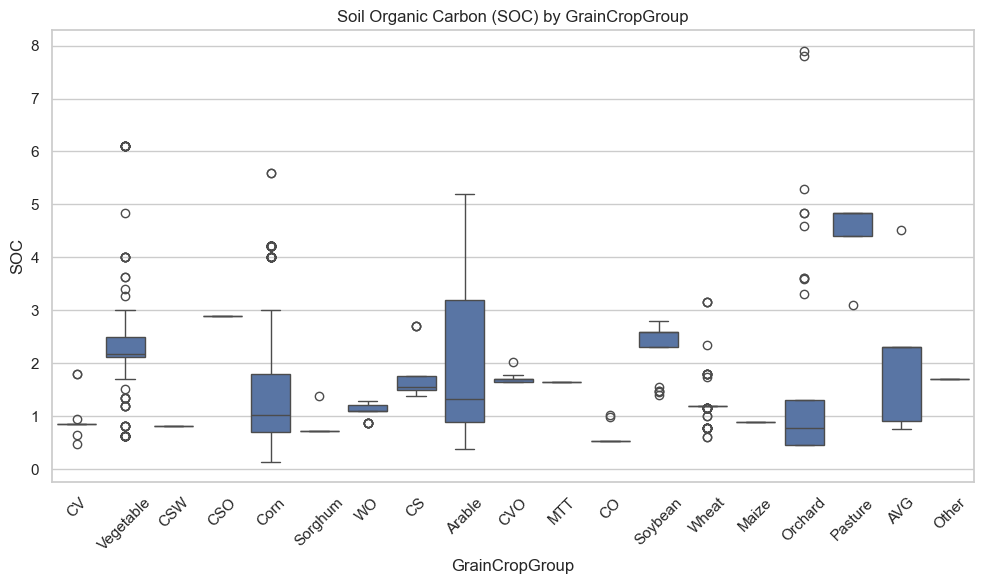

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Replace with your actual DataFrame
df = main_df.copy()

# Ensure SOC is numeric and management variables are present
management_vars = ['CoverCropGroup', 'Tillage_Top_T', 'Rotation_Top_T', 'GrainCropGroup', 'Grazing_Top_T']
tukey_results = {}

for var in management_vars:
    if var in df.columns:
        temp_df = df[['SOC', var]].dropna()

        # Ensure SOC is numeric
        temp_df = temp_df[temp_df['SOC'].apply(lambda x: isinstance(x, (int, float)))]
        
        if temp_df[var].nunique() < 2:
            print(f"Skipping {var}: only one category present.")
            continue

        print(f"\n--- Tukey HSD Results for {var} ---")
        
        # Run ANOVA to ensure differences exist
        model = ols(f'SOC ~ C({var})', data=temp_df).fit()
        anova_table = anova_lm(model, typ=2)
        print("ANOVA Table:")
        print(anova_table)

        # Tukey HSD
        tukey = pairwise_tukeyhsd(endog=temp_df['SOC'], groups=temp_df[var], alpha=0.05)
        tukey_results[var] = tukey.summary()
        print(tukey_results[var])

        # Plot boxplot with group labels
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=temp_df, x=var, y='SOC')
        plt.title(f'Soil Organic Carbon (SOC) by {var}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


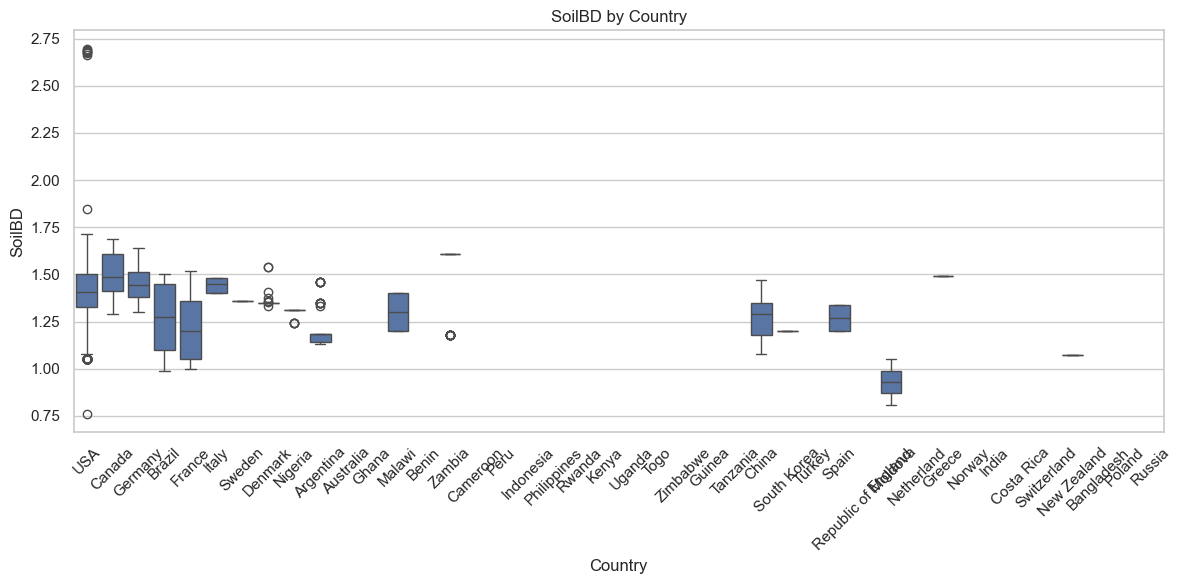

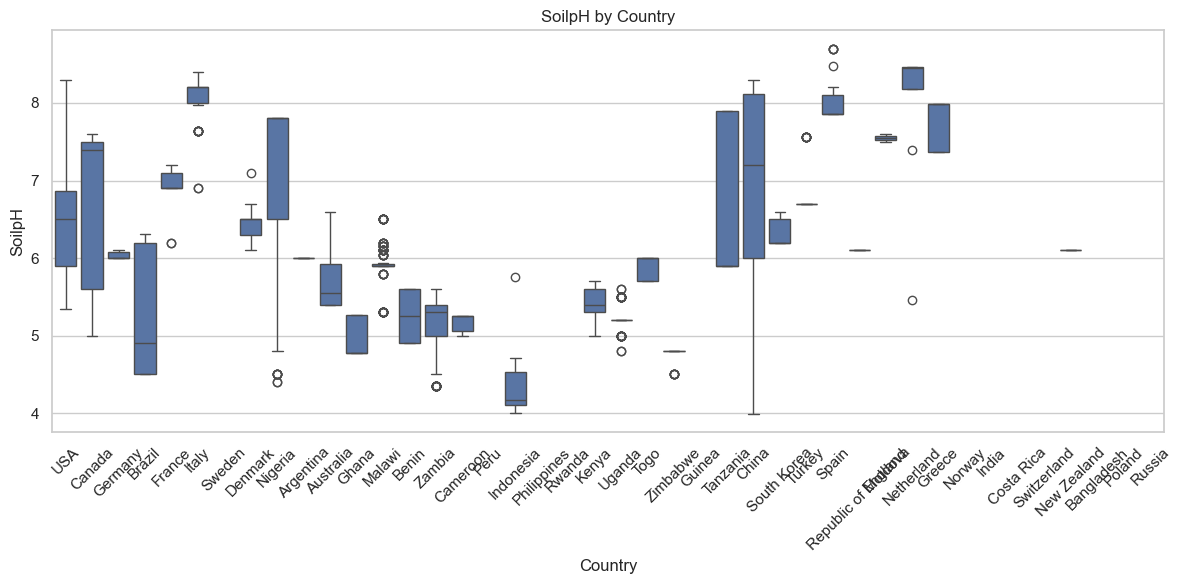

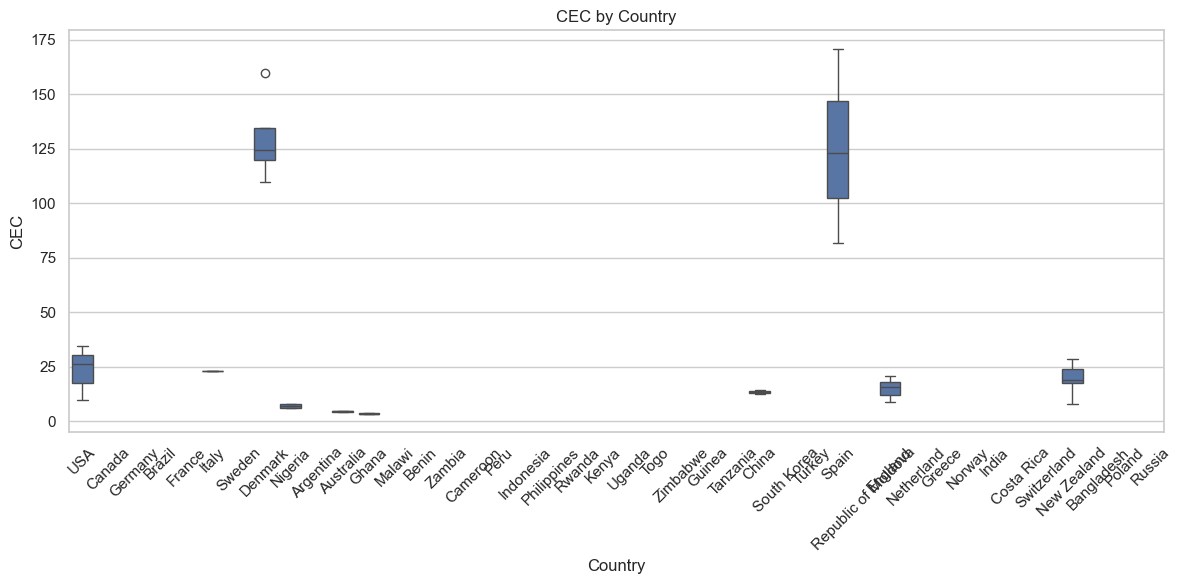

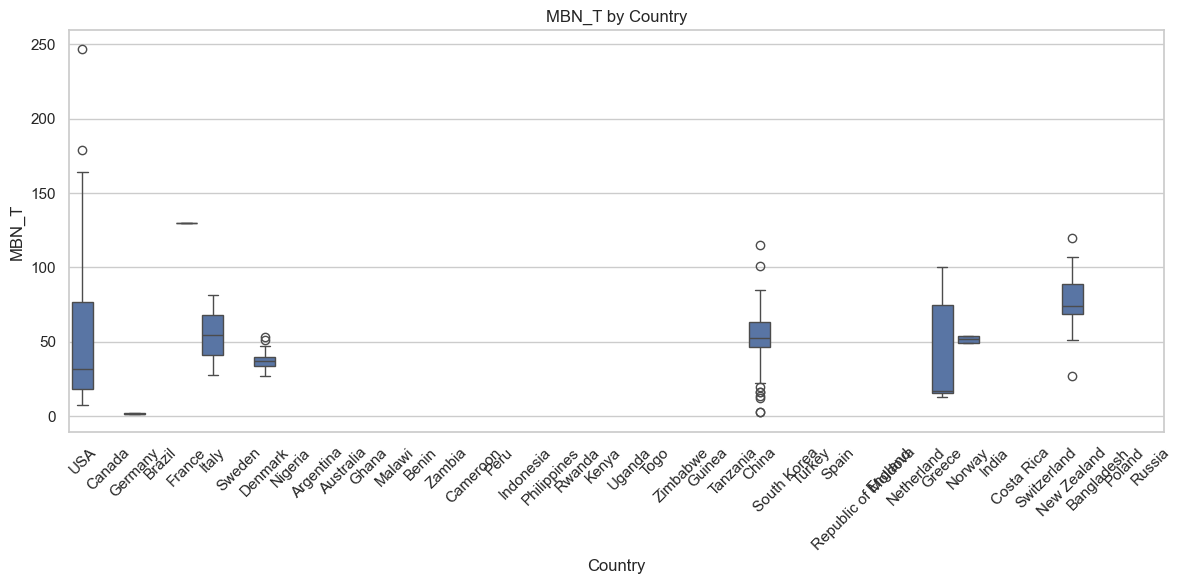

In [60]:
for var in ['SoilBD', 'SoilpH', 'CEC', 'MBN_T']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Country', y=var)
    plt.xticks(rotation=45)
    plt.title(f'{var} by Country')
    plt.tight_layout()
    plt.show()

In [30]:
# import seaborn as sns

# # Set seaborn style
# sns.set(style="whitegrid")

# # Create boxplots for key indicators by CoverCropGroup
# fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# # Boxplot: Soil Bulk Density
# sns.boxplot(data=subset_df, x='CoverCropGroup', y='SoilBD', ax=axes[0])
# axes[0].set_title('Soil Bulk Density by Cover Crop Group')
# axes[0].tick_params(axis='x', rotation=45)

# # Boxplot: Soil pH
# sns.boxplot(data=subset_df, x='CoverCropGroup', y='SoilpH', ax=axes[1])
# axes[1].set_title('Soil pH by Cover Crop Group')
# axes[1].tick_params(axis='x', rotation=45)

# # Boxplot: MBN_T
# sns.boxplot(data=subset_df, x='CoverCropGroup', y='MBN_T', ax=axes[2])
# axes[2].set_title('MBN_T by Cover Crop Group')
# axes[2].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


In [28]:
# # Calculate means and standard deviations
# grouped_means = subset_df.groupby("CoverCropGroup")[["SoilBD", "SoilpH", "MBN_T"]].mean()
# grouped_stds = subset_df.groupby("CoverCropGroup")[["SoilBD", "SoilpH", "MBN_T"]].std()

# # Group order for plotting
# group_order = grouped_means.index.tolist()

# # Create bar plots
# fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# # SoilBD
# axes[0].bar(group_order, grouped_means["SoilBD"], yerr=grouped_stds["SoilBD"], capsize=5)
# axes[0].set_title("Mean Soil Bulk Density by Cover Crop Group")
# axes[0].set_ylabel("SoilBD")
# axes[0].tick_params(axis='x', rotation=45)

# # SoilpH
# axes[1].bar(group_order, grouped_means["SoilpH"], yerr=grouped_stds["SoilpH"], capsize=5)
# axes[1].set_title("Mean Soil pH by Cover Crop Group")
# axes[1].set_ylabel("SoilpH")
# axes[1].tick_params(axis='x', rotation=45)

# # MBN_T
# axes[2].bar(group_order, grouped_means["MBN_T"], yerr=grouped_stds["MBN_T"], capsize=5)
# axes[2].set_title("Mean MBN_T by Cover Crop Group")
# axes[2].set_ylabel("MBN_T")
# axes[2].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


In [29]:
# import matplotlib.pyplot as plt

# # List of indicators
# geo_indicators = ['SoilpH', 'SoilBD', 'CEC', 'SOC', 'MBN_T']

# # Ensure SOC is in subset_df
# if 'SOC' not in subset_df.columns:
#     subset_df['SOC'] = main_df['BackgroundSOC']

# # Grid layout
# n = len(geo_indicators)
# cols = 3
# rows = (n + cols - 1) // cols  # Ceiling division

# # Create figure and axes
# fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
# axes = axes.flatten()

# # Create scatter plots for each indicator
# for i, indicator in enumerate(geo_indicators):
#     sc = axes[i].scatter(
#         subset_df['Longitude'],
#         subset_df['Latitude'],
#         c=subset_df[indicator],
#         cmap='viridis',
#         alpha=0.7,
#         edgecolor='k'
#     )
#     axes[i].set_title(f"{indicator}")
#     axes[i].set_xlabel("Longitude")
#     axes[i].set_ylabel("Latitude")
#     plt.colorbar(sc, ax=axes[i], label=indicator)

# # Hide any unused axes
# for j in range(len(geo_indicators), len(axes)):
#     fig.delaxes(axes[j])

# # Save the combined figure
# plt.savefig("combined_geographic_distribution.png", dpi=300)
# plt.close()


## Inferential statistics

In [18]:
import scipy.stats as stats

# Define the soil indicators to test
indicators = ['SoilBD', 'SoilpH', 'CEC', 'SOC', 'MBN_T']

# Create a function to perform one-way ANOVA for each indicator
def run_anova(df, group_col, indicators):
    results = {}
    for indicator in indicators:
        # Drop NaNs for the current indicator
        data = df[[group_col, indicator]].dropna()
        # Group the data by the group_col
        groups = [group[indicator].values for name, group in data.groupby(group_col)]
        if len(groups) > 1:
            stat, pval = stats.f_oneway(*groups)
            results[indicator] = {'F-statistic': stat, 'p-value': pval}
        else:
            results[indicator] = {'F-statistic': None, 'p-value': None}
    return results

# Run ANOVA for CoverCropGroup
anova_results = run_anova(subset_df, 'CoverCropGroup', indicators)

# Print results
for var, res in anova_results.items():
    print(f"{var}: F = {res['F-statistic']:.3f}, p = {res['p-value']:.4f}")


SoilBD: F = 2.922, p = 0.0002
SoilpH: F = 11.338, p = 0.0000
CEC: F = 1.503, p = 0.2282
SOC: F = 43.451, p = 0.0000
MBN_T: F = 4.599, p = 0.0000


### Tukey's HSD test - identify which specific cover crop groups differ (post hoc analysis after ANOVA).

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Drop missing values for SOC and CoverCropGroup
tukey_data = subset_df[['SOC', 'CoverCropGroup']].dropna()

# Run Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=tukey_data['SOC'],
                                 groups=tukey_data['CoverCropGroup'],
                                 alpha=0.05)

# Print results
print(tukey_result.summary())


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
               AVG           Brassica   0.1037    1.0 -0.6314  0.8388  False
               AVG          Broadleaf    -0.15    1.0 -0.9876  0.6876  False
               AVG Broadleaf/Brassica  -1.4196 0.9781 -4.5855  1.7462  False
               AVG              Grass   1.0581    0.0  0.4005  1.7157   True
               AVG                 LB   1.3194 0.3301 -0.3558  2.9946  False
               AVG                 LG  -0.0792    1.0  -0.799  0.6407  False
               AVG                 LL  -0.6939 0.0742 -1.4148   0.027  False
               AVG             Legume  -0.2599 0.9914 -0.8982  0.3784  False
               AVG        Legume_Tree   0.1418    1.0 -0.5411  0.8247  False
               AVG                MMT  -0.4206 0.9954 -1.5173  0.6761  False

### Regression Analysis - models soil indicators (like SOC) while controlling for geography (e.g., latitude, climate, etc.).
$$
SOC = \beta_0 + \beta_1 \cdot \text{CoverCropGroup} + \beta_2 \cdot \text{Latitude} + \beta_3 \cdot \text{Elevation} + \epsilon
$$

In [20]:
import statsmodels.formula.api as smf

# Prepare data
reg_df = subset_df[['SOC', 'CoverCropGroup', 'Latitude', 'Elevation']].dropna()

# Run linear regression
model = smf.ols('SOC ~ C(CoverCropGroup) + Latitude + Elevation', data=reg_df).fit()

# Show results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    SOC   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     45.66
Date:                Fri, 11 Jul 2025   Prob (F-statistic):          2.95e-132
Time:                        20:55:47   Log-Likelihood:                -3107.8
No. Observations:                2400   AIC:                             6252.
Df Residuals:                    2382   BIC:                             6356.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Boxplots with Significance Markers - visuals showing group means and marking pairs with significant differences.

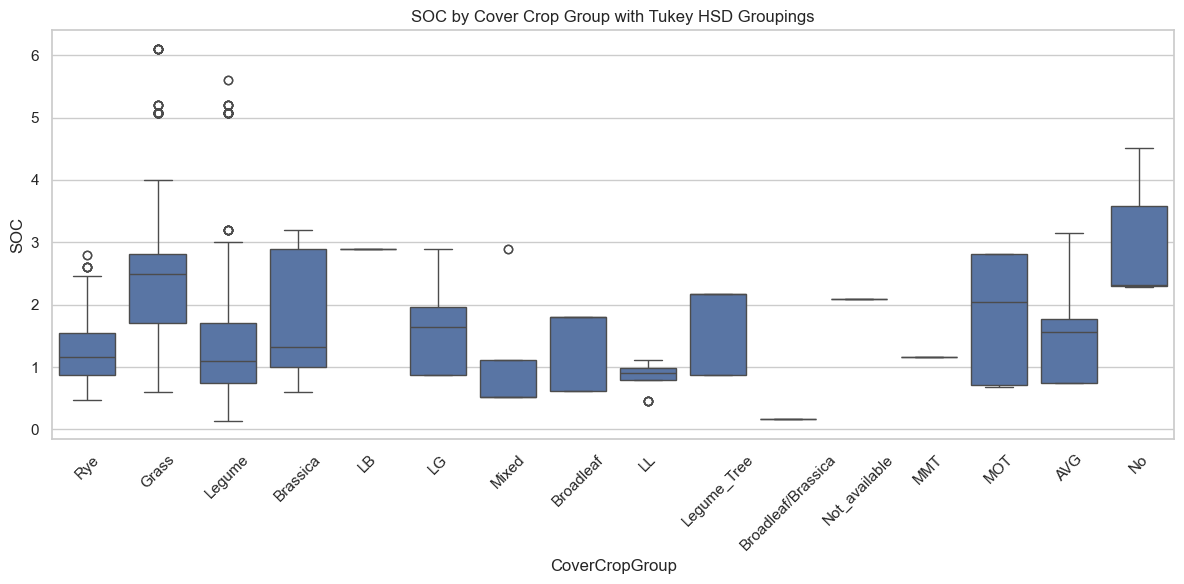


Tukey HSD Groupings:

                         AVG      Brassica     Broadleaf  Broadleaf/Brassica  \
AVG                 1.000000  1.000000e+00  9.999997e-01            0.978061   
Brassica            1.000000  1.000000e+00  9.955310e-01            0.953886   
Broadleaf           1.000000  9.955310e-01  1.000000e+00            0.992263   
Broadleaf/Brassica  0.978061  9.538857e-01  9.922631e-01            1.000000   
Grass               0.000004  3.390621e-13  1.046002e-10            0.308548   
LB                  0.330089  3.892789e-01  1.441518e-01            0.325228   
LG                  1.000000  9.976211e-01  1.000000e+00            0.985414   
LL                  0.074183  9.430263e-06  2.254724e-01            0.999989   
Legume              0.991425  8.280944e-02  9.999988e-01            0.996508   
Legume_Tree         0.999998  1.000000e+00  9.579748e-01            0.941589   
MMT                 0.995393  8.962296e-01  9.999592e-01            0.999600   
MOT              

In [23]:
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Tukey HSD using scikit-posthocs
soc_data = subset_df[['CoverCropGroup', 'SOC']].dropna()
tukey_letters = sp.posthoc_tukey(soc_data, val_col='SOC', group_col='CoverCropGroup', sort=True)

# Create boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=soc_data, x='CoverCropGroup', y='SOC')
ax.set_title('SOC by Cover Crop Group with Tukey HSD Groupings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display grouping letters
print("\nTukey HSD Groupings:\n")
print(tukey_letters)


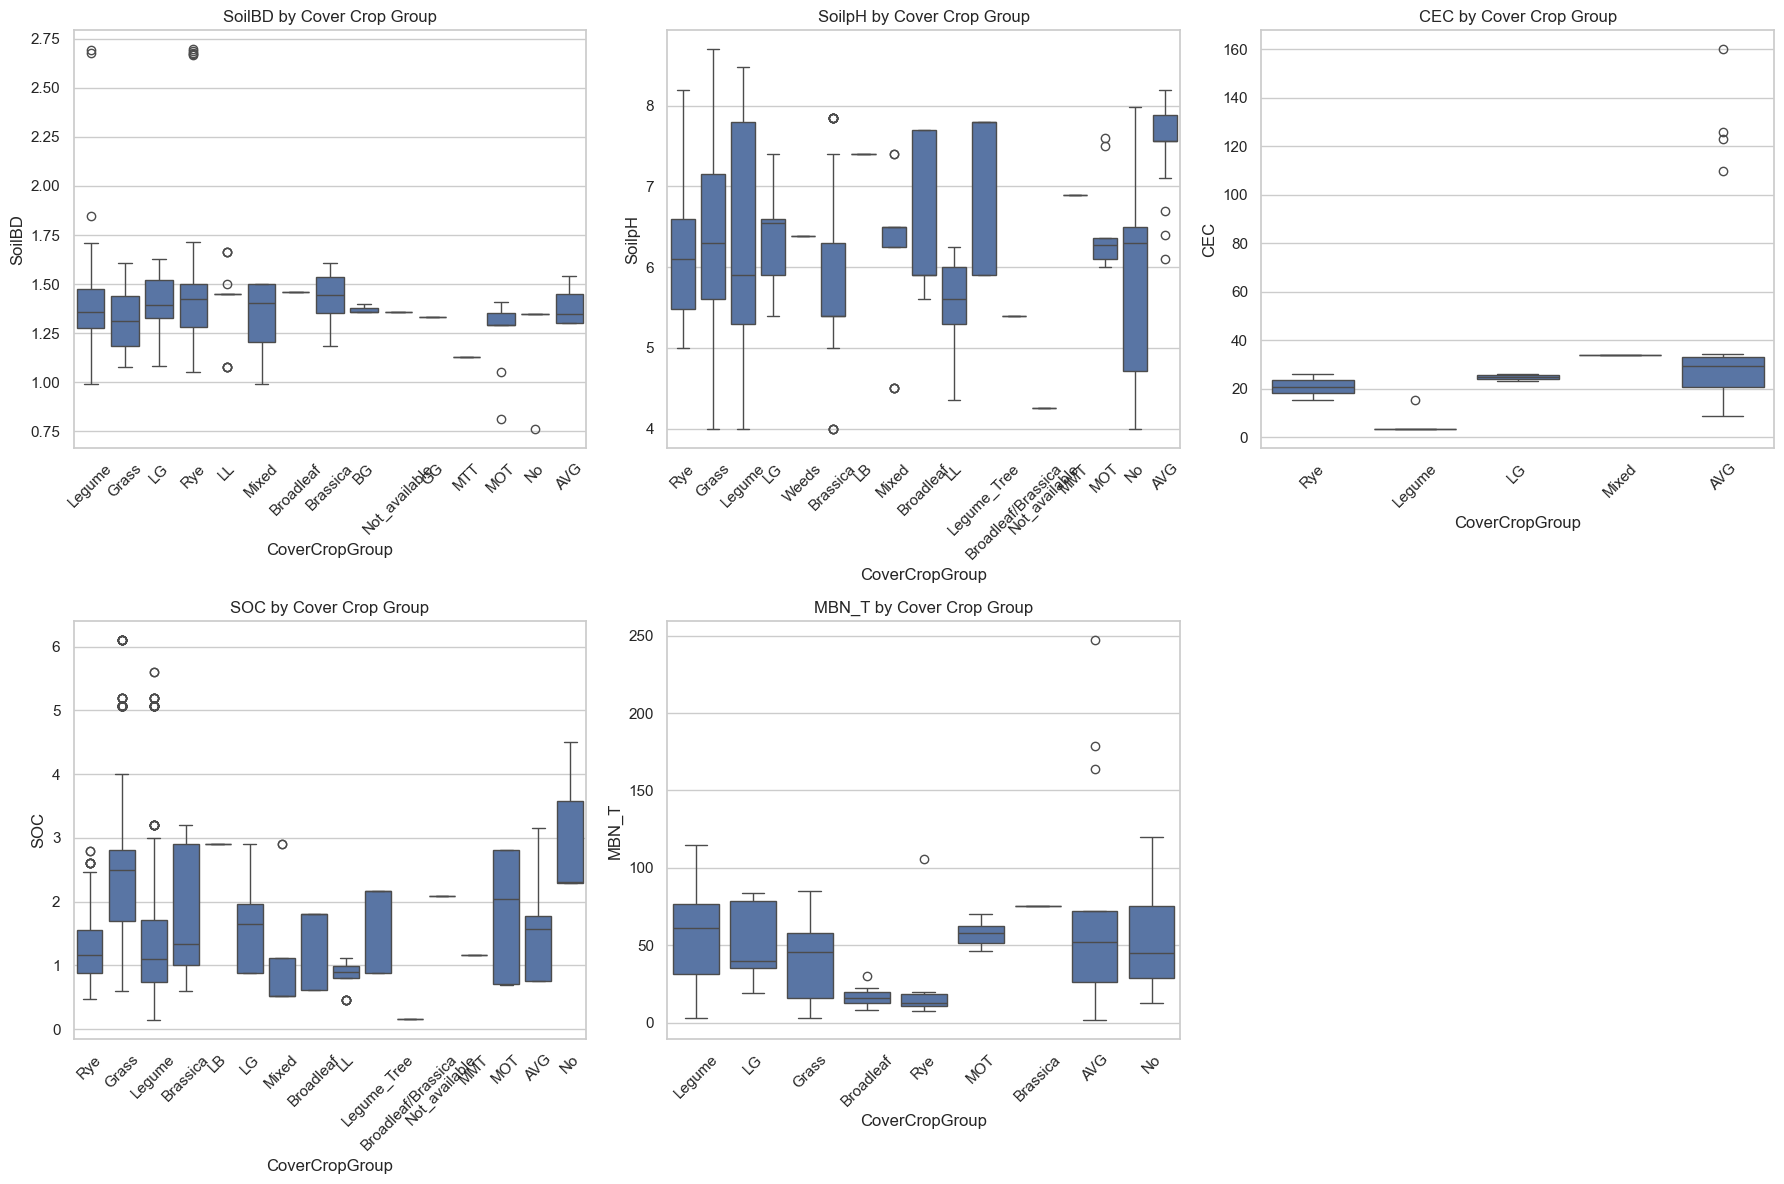

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Excel file
file_path = "SoilHealthDB_V2.xlsx"
excel_file = pd.ExcelFile(file_path)
main_df = excel_file.parse("Sheet1")

# Prepare the subset DataFrame with required columns
columns_of_interest = [
    'CoverCropGroup', 'SoilBD', 'SoilpH', 'CEC', 'BackgroundSOC', 'MBN_T'
]
subset_df = main_df[columns_of_interest].copy()
subset_df.rename(columns={'BackgroundSOC': 'SOC'}, inplace=True)

# Define soil indicators to plot
indicators = ['SoilBD', 'SoilpH', 'CEC', 'SOC', 'MBN_T']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each indicator and create a boxplot
for i, indicator in enumerate(indicators):
    # Drop missing values for this indicator
    data = subset_df[['CoverCropGroup', indicator]].dropna()

    # Check if there's enough data to plot
    if data['CoverCropGroup'].nunique() > 1 and len(data) > 0:
        sns.boxplot(data=data, x='CoverCropGroup', y=indicator, ax=axes[i])
        axes[i].set_title(f'{indicator} by Cover Crop Group')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

# Hide any remaining unused subplots
if len(indicators) < len(axes):
    for j in range(len(indicators), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Boxplots by Country

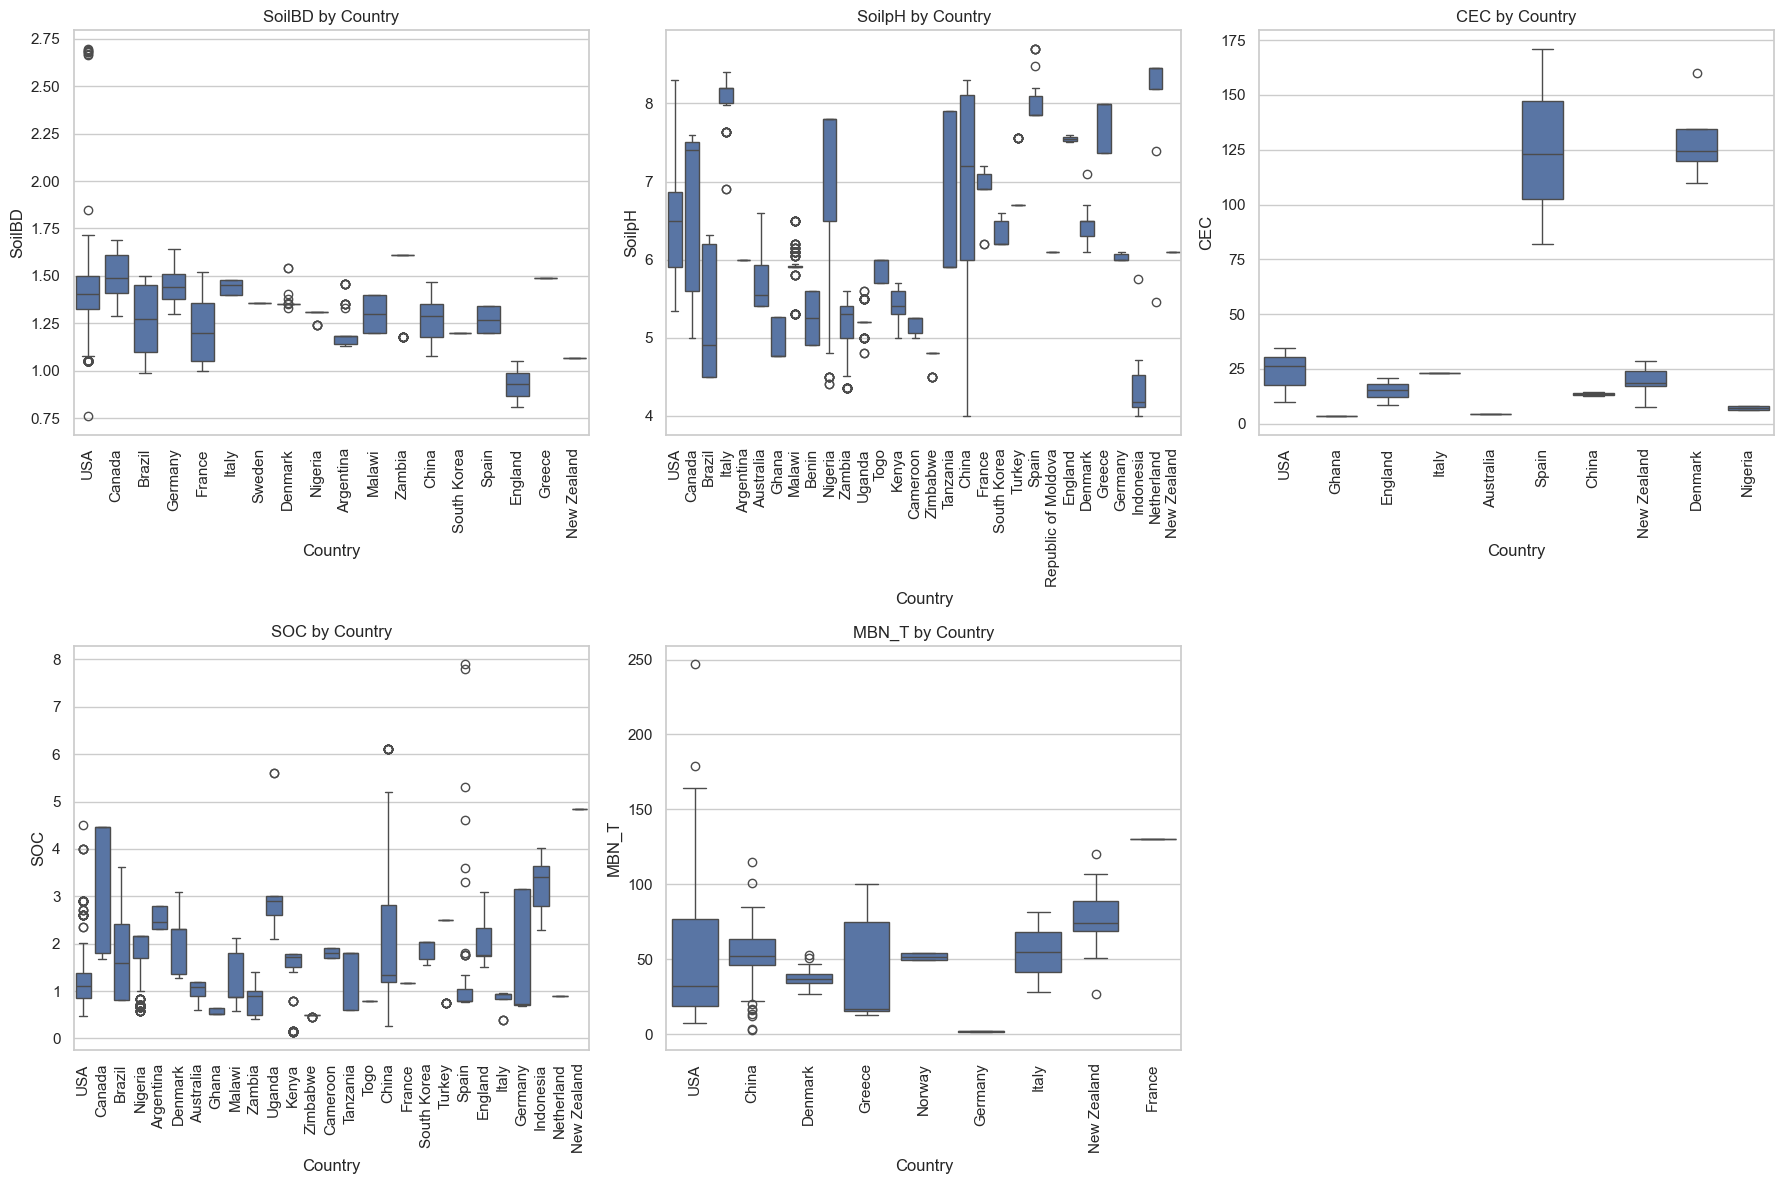

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = "SoilHealthDB_V2.xlsx"
excel_file = pd.ExcelFile(file_path)
main_df = excel_file.parse("Sheet1")

# Rename BackgroundSOC to SOC for clarity
main_df = main_df.copy()
main_df.rename(columns={'BackgroundSOC': 'SOC'}, inplace=True)

# Define indicators to plot
indicators = ['SoilBD', 'SoilpH', 'CEC', 'SOC', 'MBN_T']

# Set up the subplot grid (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Generate boxplots for each soil indicator grouped by Country
for i, indicator in enumerate(indicators):
    data = main_df[['Country', indicator]].dropna()

    if data['Country'].nunique() > 1 and len(data) > 0:
        sns.boxplot(data=data, x='Country', y=indicator, ax=axes[i])
        axes[i].set_title(f'{indicator} by Country')
        axes[i].tick_params(axis='x', rotation=90)
    else:
        axes[i].set_visible(False)

# Remove unused subplots if necessary
if len(indicators) < len(axes):
    for j in range(len(indicators), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
